<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

In [1]:
#importing the libaries

import pandas as pd
import matplotlib.pyplot as plt

**Read bookings data in a datagrame**

In [3]:
df_date = pd.read_csv("C:/Users/sumit_w9fhcol/Desktop/Projects/Atliq_Hospitality/Excel_Files/dim_date.csv")
df_hotels = pd.read_csv("C:/Users/sumit_w9fhcol/Desktop/Projects/Atliq_Hospitality/Excel_Files/dim_hotels.csv")
df_rooms = pd.read_csv("C:/Users/sumit_w9fhcol/Desktop/Projects/Atliq_Hospitality/Excel_Files/dim_rooms.csv")
df_aggregated_bookings = pd.read_csv("C:/Users/sumit_w9fhcol/Desktop/Projects/Atliq_Hospitality/Excel_Files/fact_aggregated_bookings.csv")
df_bookings = pd.read_csv("C:/Users/sumit_w9fhcol/Desktop/Projects/Atliq_Hospitality/Excel_Files/fact_bookings.csv")

**Explore bookings data**

In [5]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100


In [7]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

In [9]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

**Explore aggregate bookings**

**Finding out unique propery IDs in aggregate booking dataset**

In [11]:
df_aggregated_bookings['property_id'].unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

**Finding out days on which books are greater than capacity**

In [13]:
df_aggregated_bookings[df_aggregated_bookings.successful_bookings>df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**Finding out properties that have highest capacity**

In [15]:
df_aggregated_bookings[df_aggregated_bookings.capacity==df_aggregated_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

In [17]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**(1) Clean invalid guests**

In [19]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


As we can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [21]:
df_bookings.shape

(134590, 12)

**(2) Outlier removal in revenue generated**

In [23]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [25]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
avg,std

(15378.05412734973, 93036.03867097024)

In [27]:
higher_limit = avg + std*3
higher_limit

294486.1701402605

In [29]:
lower_limit = avg - std*3
lower_limit

-263730.061885561

In [31]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [25]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [33]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings.shape

(134585, 12)

**(3) Outlier removal in revenue realized**

In [35]:
df_bookings.revenue_realized.describe()

count    134585.000000
mean      12696.095025
std        6928.058192
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [37]:
higher_limit = df_bookings.revenue_realized.mean() + df_bookings.revenue_realized.std()*3
higher_limit

33480.26960155874

In [39]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,31-07-22,31-07-22,1/8/2022,4.0,RT4,makeyourtrip,4.0,Checked Out,38760,38760


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types.

In [41]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [43]:
df_bookings[df_bookings.room_category == "RT4"].revenue_realized.describe()

count    16073.000000
mean     23440.103652
std       9048.865206
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [45]:
# mean + 3*standard deviation
23439.308444 + 9048.599076*3

50585.105672000005

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

**Identifying Columns with Null Values in the Bookings Table to Clean and Remove Unwanted Data**


In [47]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77905
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc 

**Identifying Columns with Null Values in the aggregate Bookings Table to Clean and Remove Unwanted Data**

In [49]:
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [55]:
df_aggregated_bookings[df_aggregated_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


One observation in the above DataFrame is that there are two null values in the capacity column, both occurring in the RT1 room category. Based on common sense, capacity cannot be null. Therefore, we are calculating the median capacity for the RT1 room type and replacing the null values with the median capacity value.

In [57]:
RT1_median = df_aggregated_bookings[df_aggregated_bookings.room_category == "RT1"].capacity.median()
RT1_median

30.0

In [59]:
df_aggregated_bookings = df_aggregated_bookings.fillna({'capacity': RT1_median})

df_aggregated_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,30.0
14,17562,1-May-22,RT1,12,30.0


**In aggregate bookings finding out records that have successful_bookings value greater than capacity and Filtering those records**

In [74]:
df_aggregated_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


In [76]:
df_aggregated_bookings[df_aggregated_bookings.successful_bookings>df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


***
### ==> 3. Data Transformation
***

**Create occupancy percentage column**

In [78]:
df_aggregated_bookings['occ_pct'] = df_aggregated_bookings.apply(lambda row: (row['successful_bookings']/row['capacity'])*100, axis=1).round(2)
df_aggregated_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


***
### ==> 4. Insights Generation
***

**1. What is an average occupancy rate in each of the room categories?**

In [80]:
df_aggregated_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [82]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [84]:
df = pd.merge(df_aggregated_bookings,df_rooms, left_on = "room_category", right_on = "room_id")
df.drop("room_id", axis=1, inplace = True)
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard


In [86]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

**2. Print average occupancy rate per city**

In [88]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard


In [90]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [92]:
df = pd.merge(df,df_hotels, on = "property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore


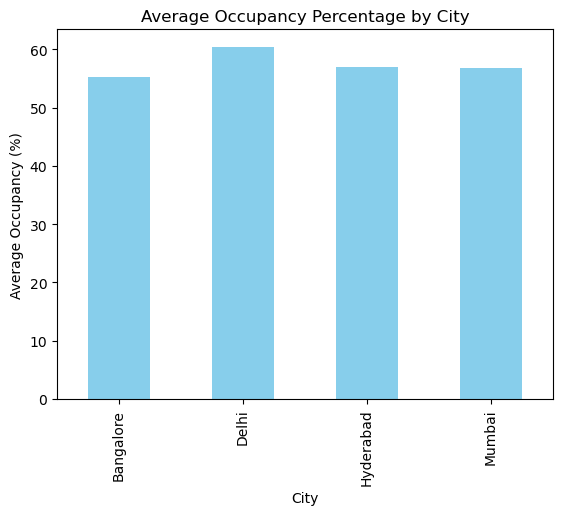

In [128]:
df.groupby("city")["occ_pct"].mean().plot(kind="bar",color="skyblue")
plt.xlabel("City"), plt.ylabel("Average Occupancy (%)"), plt.title("Average Occupancy Percentage by City")
plt.show()

**3. When was the occupancy better? Weekday or Weekend?**

In [96]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore


In [98]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [102]:
print(df.columns)
print(df_date.columns)

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city'],
      dtype='object')
Index(['date', 'mmm yy', 'week no', 'day_type'], dtype='object')


In [104]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.drop(columns=['date'], inplace=True)
df.head() 

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,May 22,W 20,weekeday


In [106]:
df.groupby('day_type')['occ_pct'].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [108]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,Jun 22,W 24,weekeday


In [110]:
df_june_22.groupby('city')['occ_pct'].mean().round(2)

city
Bangalore    56.58
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Name: occ_pct, dtype: float64

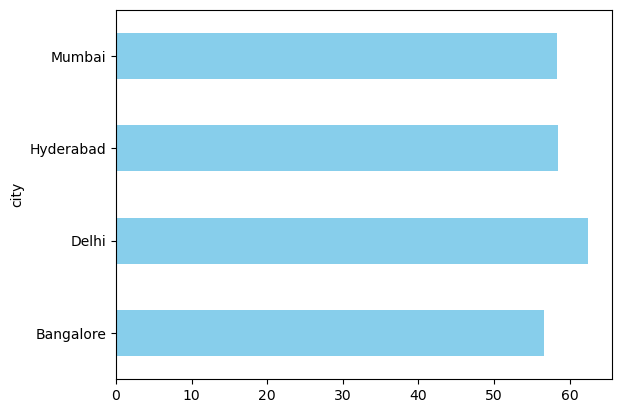

In [112]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).plot(kind="barh",color="skyblue")
plt.show()

**5. Print revenue realized per city**

In [114]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [116]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [118]:
df_bookings_all = pd.merge(df_bookings,df_hotels, on = "property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [120]:
df_bookings_all.groupby('city')["revenue_realized"].sum()

city
Bangalore    420397050
Delhi        294466018
Hyderabad    325232870
Mumbai       668608011
Name: revenue_realized, dtype: int64

**6. Print revenue realized per hotel type**

In [122]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [124]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     66125495
Atliq Grands     211523664
Atliq Bay        260025978
Atliq Blu        260855522
Atliq City       285811939
Atliq Palace     304081863
Atliq Exotica    320279488
Name: revenue_realized, dtype: int64

**7. Print a pie chart of revenue realized per booking platform**

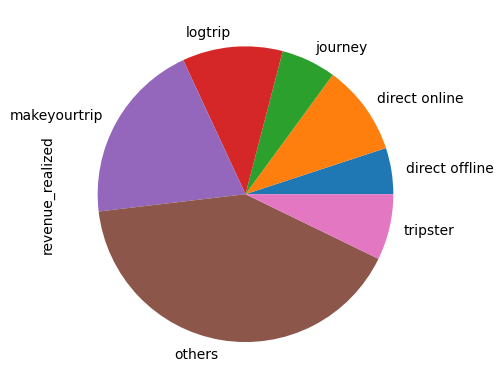

In [126]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")
plt.show()